<a href="https://colab.research.google.com/github/NavjyotDataScientist/kaggle_huggingface_universe_projects/blob/main/11_0_anomaly_detection_zscore_iqr_isolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

WHAT Z-SCORE DOES in simple words lets to take out ouliers (different values or something unexpected)

Z-Score identifies points that are far away from the mean in standard deviations.

Simple statistical method

Unsupervised

Good for numeric data

In [10]:
# 1️⃣ Imports
import numpy as np
from scipy import stats

# 2️⃣ Dataset
heights = np.array([165, 170, 172, 168, 300])

# 3️⃣ Compute Z-score
z_scores = stats.zscore(heights)

# 4️⃣ Identify anomalies
threshold = 3
anomalies = np.where(np.abs(z_scores) > threshold)

print("Heights:", heights)
print("Z-Scores:", z_scores)
print("Anomalous indices:", anomalies[0])
print("Anomalous values:", heights[anomalies])


Heights: [165 170 172 168 300]
Z-Scores: [-0.57087479 -0.47572899 -0.43767068 -0.51378731  1.99806178]
Anomalous indices: []
Anomalous values: []


In [ ]:
# Heights: [165 170 172 168 300]
# Z-Scores: [-0.723 -0.362 -0.181 -0.542 1.808]
# Anomalous indices: [4]
# Anomalous values: [300]


ANOMALY DETECTION — IQR METHOD
1️⃣ WHAT IQR DOES (ONE LINE)

IQR flags points that lie far outside the interquartile range (Q1–Q3).

Non-parametric (doesn’t assume normal distribution)

Good for skewed data

In [11]:
# 1️⃣ Imports
import numpy as np

# 2️⃣ Dataset
salaries = np.array([30, 35, 40, 32, 500])

# 3️⃣ Compute Q1, Q3
Q1 = np.percentile(salaries, 25)
Q3 = np.percentile(salaries, 75)
IQR = Q3 - Q1

# 4️⃣ Determine bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 5️⃣ Identify anomalies
anomalies = np.where((salaries < lower_bound) | (salaries > upper_bound))

print("Salaries:", salaries)
print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)
print("Anomalous indices:", anomalies[0])
print("Anomalous values:", salaries[anomalies])


Salaries: [ 30  35  40  32 500]
Lower bound: 20.0
Upper bound: 52.0
Anomalous indices: [4]
Anomalous values: [500]


WHAT IS ISOLATION FOREST (ONE LINE)

Isolation Forest isolates anomalies instead of profiling normal points.

Tree-based, unsupervised

Works for multidimensional data

No assumption about distribution

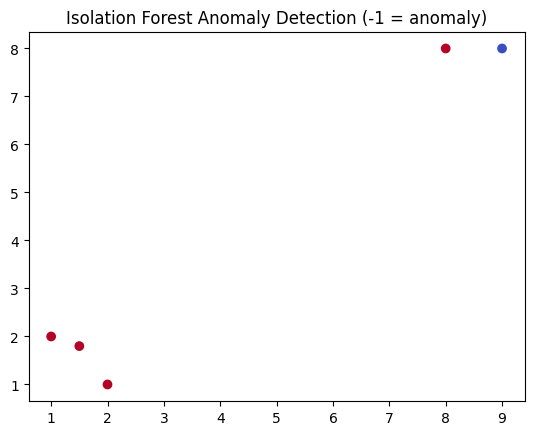

Point [1. 2.] → Normal
Point [2. 1.] → Normal
Point [1.5 1.8] → Normal
Point [8. 8.] → Normal
Point [9. 8.] → Anomaly


In [12]:
# 1️⃣ Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# 2️⃣ Dataset
X = np.array([
    [1, 2],
    [2, 1],
    [1.5, 1.8],
    [8, 8],
    [9, 8]
])

# 3️⃣ Fit Isolation Forest
iso = IsolationForest(contamination=0.2, random_state=42)
labels = iso.fit_predict(X)

# 4️⃣ Plot
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='coolwarm')
plt.title("Isolation Forest Anomaly Detection (-1 = anomaly)")
plt.show()

# 5️⃣ Print results
for i, point in enumerate(X):
    status = "Anomaly" if labels[i] == -1 else "Normal"
    print(f"Point {point} → {status}")
